In [80]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

In [81]:
emp_data = pd.read_csv('/kaggle/input/employee-dataset/Employee.csv')
print(emp_data.isnull().sum(), end = '\n \n')
print(emp_data.info())

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   in

In [82]:
print(emp_data['Education'].value_counts(), end = '\n \n')
print(emp_data['City'].value_counts(), end = '\n \n')
print(emp_data['Gender'].value_counts(), end = '\n \n')
print(emp_data['EverBenched'].value_counts(), end = '\n \n')

Education
Bachelors    3601
Masters       873
PHD           179
Name: count, dtype: int64
 
City
Bangalore    2228
Pune         1268
New Delhi    1157
Name: count, dtype: int64
 
Gender
Male      2778
Female    1875
Name: count, dtype: int64
 
EverBenched
No     4175
Yes     478
Name: count, dtype: int64
 


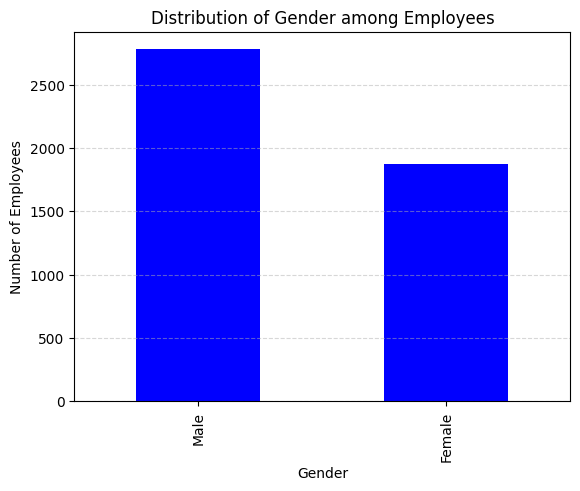

In [83]:
# What is the gender distribution within the workforce?
emp_data['Gender'].value_counts().plot(kind='bar', color='blue')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.title('Distribution of Gender among Employees')
plt.xlabel('Gender')
plt.ylabel('Number of Employees')
plt.show()

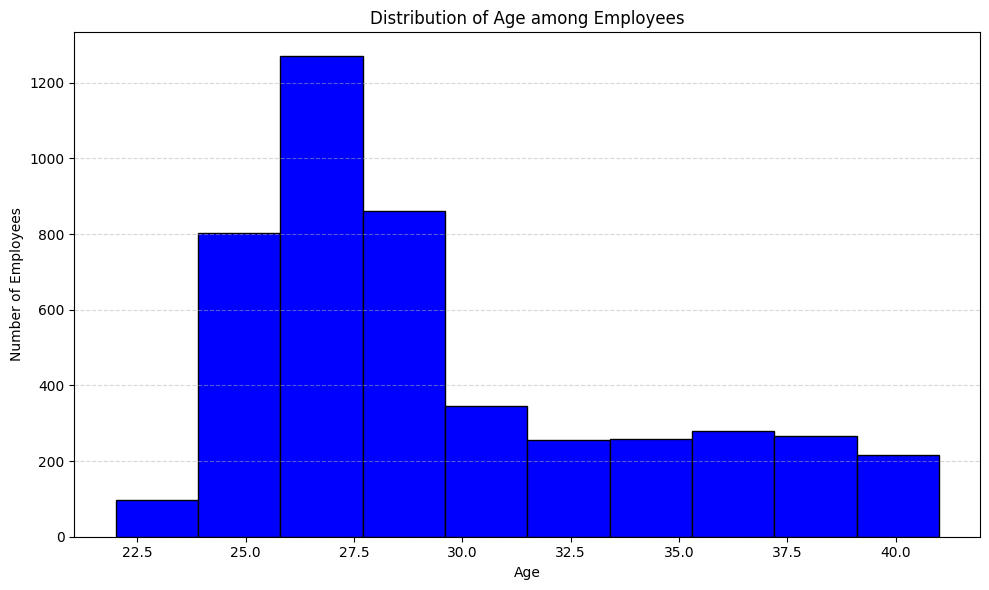

In [84]:
# What is the age distribution within the workforce?
plt.figure(figsize=(10, 6))  # set the figure size
plt.hist(emp_data['Age'], bins=10, color='blue', edgecolor='black', alpha=1)
plt.title('Distribution of Age among Employees')
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

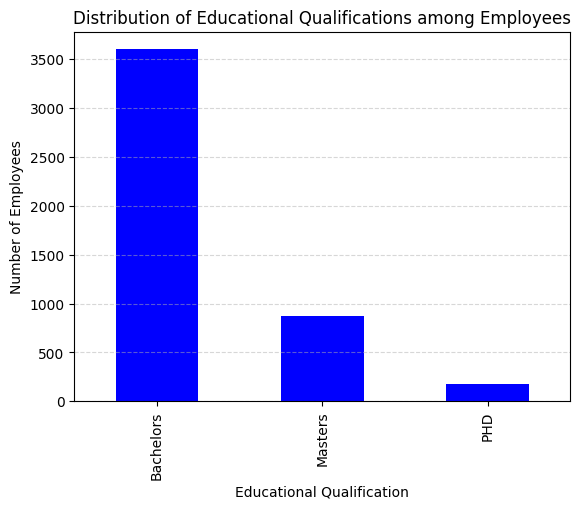

In [85]:
# What is the distribution of educational qualifications among employees?
emp_data['Education'].value_counts().plot(kind='bar', color='blue')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.title('Distribution of Educational Qualifications among Employees')
plt.xlabel('Educational Qualification')
plt.ylabel('Number of Employees')
plt.show()

City
Bangalore    8.140485
New Delhi    7.477960
Pune         7.998423
Name: LengthOfService, dtype: float64


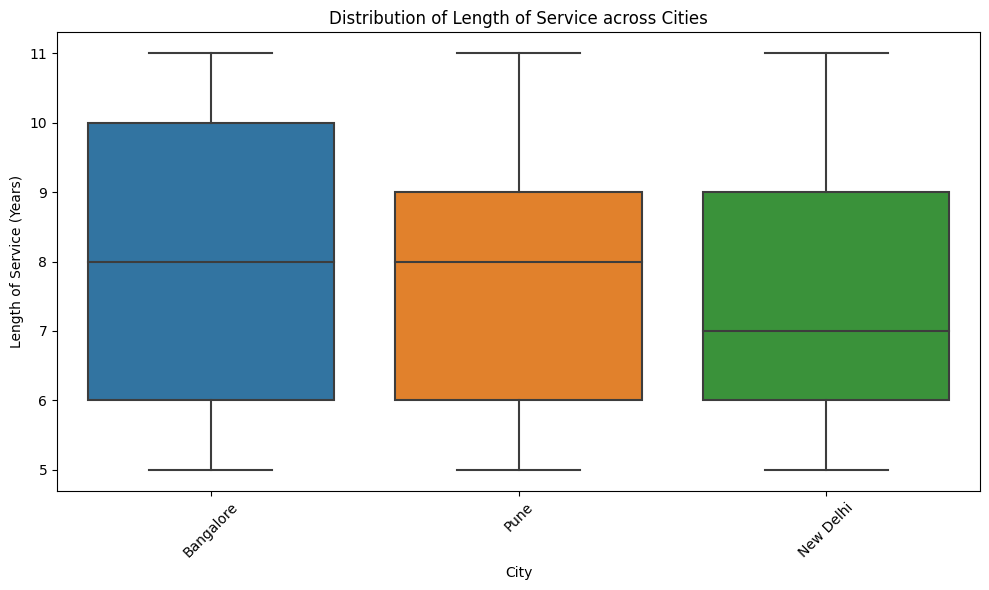

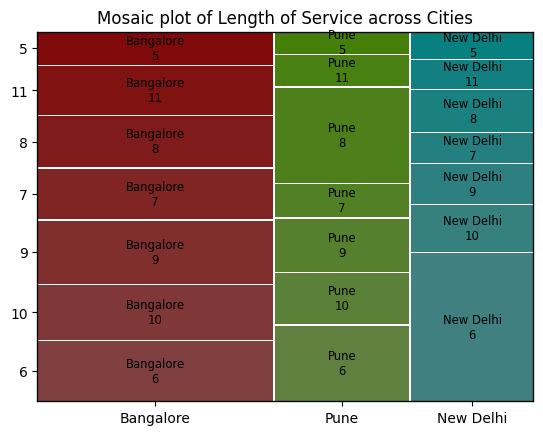

In [86]:
# How does the length of service (Joining Year) vary across different cities?

emp_data['LengthOfService'] = emp_data['JoiningYear'].apply(lambda x: pd.Timestamp.now().year - x)
avg_service_by_city = emp_data.groupby('City')['LengthOfService'].mean()

print(avg_service_by_city)

plt.figure(figsize=(10, 6))
sns.boxplot(data=emp_data, x='City', y='LengthOfService')
plt.title('Distribution of Length of Service across Cities')
plt.xlabel('City')
plt.ylabel('Length of Service (Years)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


mosaic(emp_data, ['City', 'LengthOfService'])
plt.title('Mosaic plot of Length of Service across Cities')
plt.show()

emp_data.drop(columns = ['JoiningYear'], inplace = True)

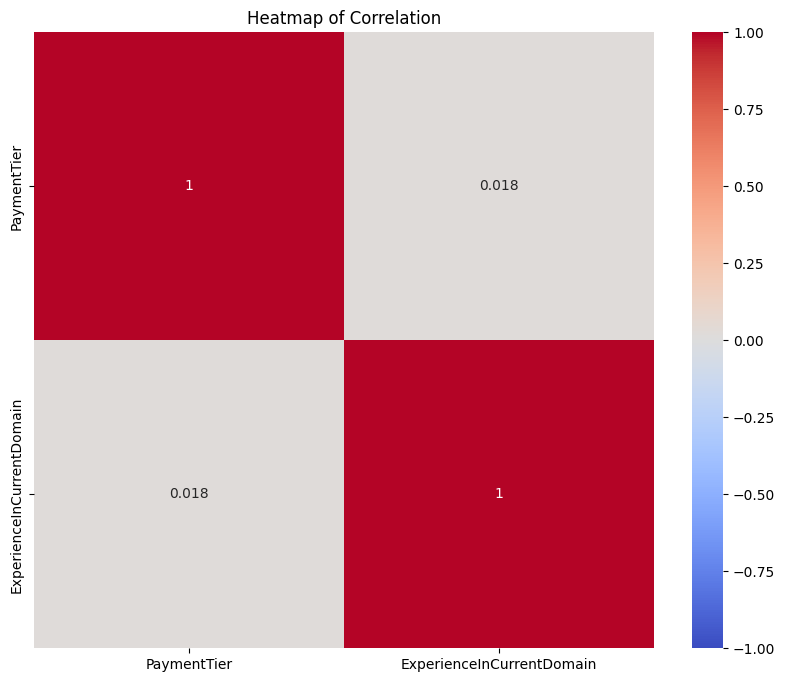

,Education,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,LengthOfService
0,Bachelors,Bangalore,3,34,Male,No,0,0,6
1,Bachelors,Pune,1,28,Female,No,3,1,10
2,Bachelors,New Delhi,3,38,Female,No,2,0,9
3,Masters,Bangalore,3,27,Male,No,5,1,7
4,Masters,Pune,3,24,Male,Yes,2,1,6


In [87]:
# Is there a correlation between Payment Tier and Experience in Current Domain?

plt.figure(figsize=(10, 8))
sns.heatmap(emp_data[['PaymentTier', 'ExperienceInCurrentDomain']].corr(method ='pearson'), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of Correlation')
plt.show()
#No correlation

emp_data.head()

In [88]:
emp_data['Female'] = emp_data['Gender'].apply(lambda x: 1 if x == 'Female' else 0)
emp_data['EverBenched'] = emp_data['EverBenched'].apply(lambda x: 1 if x == 'Yes' else 0)
emp_data.drop(columns = ['Gender'], inplace = True)
final_data = pd.get_dummies(emp_data, columns=['Education', 'City'], drop_first=True)
final_data.head()

,PaymentTier,Age,EverBenched,ExperienceInCurrentDomain,LeaveOrNot,LengthOfService,Female,Education_Masters,Education_PHD,City_New Delhi,City_Pune
0,3,34,0,0,0,6,0,False,False,False,False
1,1,28,0,3,1,10,1,False,False,False,True
2,3,38,0,2,0,9,1,False,False,True,False
3,3,27,0,5,1,7,0,True,False,False,False
4,3,24,1,2,1,6,0,True,False,False,True


In [90]:
from sklearn.model_selection import train_test_split
X = final_data.drop(columns = ['LeaveOrNot'], axis = 1)
y = final_data['LeaveOrNot']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score, classification_report, confusion_matrix
tree = DecisionTreeClassifier(max_depth = 7)
tree.fit(X_train, y_train)
predictions_tree = tree.predict(X_test)
accuracy = accuracy_score(y_test, predictions_tree)
print(f"Accuracy: {accuracy * 100:.2f}%")
precision = precision_score(y_test, predictions_tree)
print(f"Precision: {precision * 100:.2f}%")
print(confusion_matrix(y_test, predictions_tree))
print(classification_report(y_test, predictions_tree))

Accuracy: 85.87%
Precision: 89.47%
[[962  42]
 [175 357]]
              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1004
           1       0.89      0.67      0.77       532

    accuracy                           0.86      1536
   macro avg       0.87      0.81      0.83      1536
weighted avg       0.86      0.86      0.85      1536



In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score, classification_report, confusion_matrix
forest100 = RandomForestClassifier(n_estimators=100, random_state=42)
forest100.fit(X_train, y_train)
predictions_forest100 = forest100.predict(X_test)
accuracy = accuracy_score(y_test, predictions_forest100)
print(f"Accuracy: {accuracy * 100:.2f}%")
precision = precision_score(y_test, predictions_forest100)
print(f"Precision: {precision * 100:.2f}%")
print(confusion_matrix(y_test, predictions_forest100))
print(classification_report(y_test, predictions_forest100))

Accuracy: 84.83%
Precision: 82.86%
[[926  78]
 [155 377]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1004
           1       0.83      0.71      0.76       532

    accuracy                           0.85      1536
   macro avg       0.84      0.82      0.83      1536
weighted avg       0.85      0.85      0.85      1536

